## Exploratory Data Analysis(EDA) with Titanic Data Set
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

* To take a closer look at the data take help of `.head()` function of pandas library which returns first five observations of the data set.Similarly `.tail()` returns last five observations of the data set.
* To found out the total number of rows and columns in the data set using `.shape`.
* To see label of each columns in the data set using `.columns.values`
* It is also a good practice to know the columns and their corresponding data types,along with finding whether they contain null values or not with `.info()`
* The `.describe()` function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.
* Few key insights just by looking at dependent variable are as follows:
    * `.column.unique()`
    * `.column.value_counts()`
* To chech missing values in the data set's columns using `.isnull().sum()`
* To use `linear regression` for modelling,its necessary to remove correlated variables to improve your model.One can find correlations using pandas `.corr()` function and can visualize the correlation matrix using a heatmap in seaborn.
    * Dark shades represents positive correlation while lighter shades represents negative correlation.
    * If you set annot=True, you’ll get values by which features are correlated to each other in grid-cells.
    * It’s a good practice to remove correlated variables during feature selection.
* To check `Outliers`: `A box plot` (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.
* To check `the linearity of the variables` it is a good practice to `plot distribution graph` and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

In [1]:
#This librarys is to work with matrices
import pandas as pd 
# This librarys is to work with vectors
import numpy as np
# This library is to create some graphics algorithmn
import seaborn as sns
# to render the graphs
import matplotlib.pyplot as plt
# import module to set some ploting parameters
from matplotlib import rcParams
# Library to work with Regular Expressions
import re
# to ignore filterwarnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from IPython.display import Image

# This function makes the plot directly on browser
%matplotlib inline

%config Completer.use_jedi = False

# Seting a universal figure size 
rcParams['figure.figsize'] = 8,6

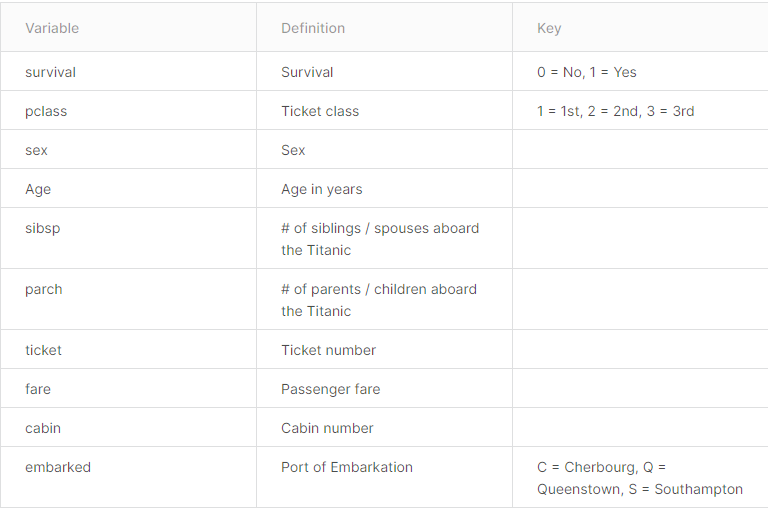

In [2]:
Image(filename='data_dict.png')

In [3]:
# Importing train dataset and to check first 5 rows of each column:

df_train = pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# To check last 5 rows of each column:

df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# To found out the total number of rows and columns in the data set

df_train.shape

(891, 12)

* Dataset comprises of 891 observations and 12 chracteriestics
* Out of which one is dependent variable and rest 11 are independent variables

In [6]:
# To label of each column

df_train.columns.values 

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

* It is also a good practice to know the columns and their corresponding data types,along with finding whether they contain null values or not with .info()

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Data contain Float, integer and object types of data.
* Age, Cabin and Embarked columns contain null/missing values.

### Summary Statistics:

In [8]:
df_train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Observations:

yukarıyı yorumla

#### Understanding Target variable

In [9]:
df_train.Pclass.unique() 

array([3, 1, 2], dtype=int64)

In [10]:
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

* Target variable/Dependent variable is discrete and categorical in nature.
* "Pclass" shows class of cabins that are from 1 to 3:  1 = 1st, 2 = 2nd, 3 = 3rd
* All Classes have passangers.

* 3rd class has most passangers.After 3rd, 1st came and 2nd class has less passangers. 

#### To fix appellation of names with correct ones:

In [11]:
df_train['appellation']=0
for i in df_train:
    df_train['appellation']=df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations 

In [12]:
df_train['appellation'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                         'Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Officer','Officer','Mrs','Mrs','Mr',
                         'Officer','Officer','Officer','Mr','Mr'],inplace=True)

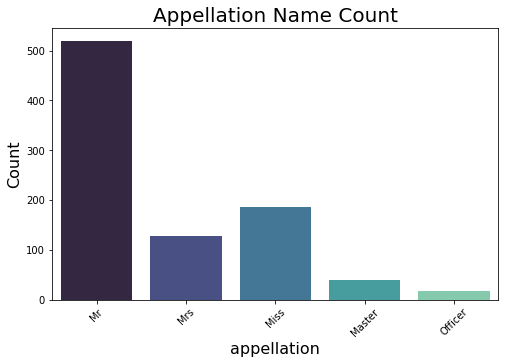

In [13]:
#defining the figure size of our graphic
plt.figure(figsize=(8,5))

#Plotting the result
sns.countplot(x='appellation', data=df_train, palette="mako")
plt.xlabel("appellation", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("Appellation Name Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

#### To check missing values

In [14]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
appellation      0
dtype: int64

<AxesSubplot:>

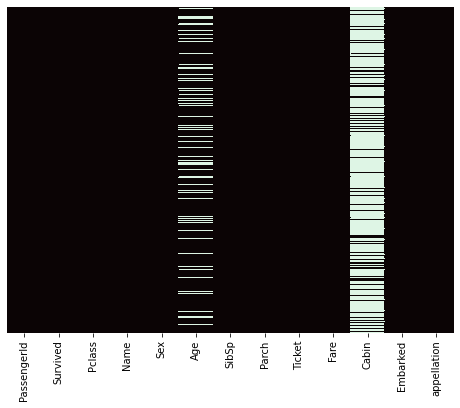

In [15]:
# To see missing values with heatmap:

sns.heatmap(df_train.isnull(),cbar=False,yticklabels=False,cmap = 'mako')

#### To fill missing values of Age column:

* We can fill as appellation of People for example;
    * df_train.groupby('appellation')['Age'].mean() #to check the average age by appellation
    * df_train.loc[(df_train.Age.isnull())&(df_train.appellation == 'Mr'),'Age']=33  # Assigning the NaN Values with the Ceil values of the mean ages (We do it for each appellation) 
I don't choose this option. Because I have to prepare same line for each appellation again and again. I want to create a function for using it at future projects. 

* We can add some condition for doing specific filling. Let's group the median age by sex, pclass and title, to have any idea and maybe input in Age NAN's: 
    *  df_train.groupby(["Sex","Pclass","appellation"])["Age"] #We can fill by sex, class of tickets and appellations.  
    * df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','appellation']).Age.transform('median') # using the groupby to transform this variables
    
* We can create a function with this formulation. Also we can use it at other columns that have missing values or we can use it at future projects.   

In [16]:
# to see age group's medians: 
age_group = df_train.groupby(["Sex","Pclass","appellation"])["Age"]

#printing the variabe that we created by median
print(age_group.median())

Sex     Pclass  appellation
female  1       Miss           29.5
                Mrs            41.5
                Officer        49.0
        2       Miss           24.0
                Mrs            32.0
        3       Miss           18.0
                Mrs            31.0
male    1       Master          4.0
                Mr             40.0
                Officer        51.0
        2       Master          1.0
                Mr             31.0
                Officer        46.5
        3       Master          4.0
                Mr             26.0
Name: Age, dtype: float64


In [17]:
# To create a Function: 

def missing_data_filler(df, group_list, column_to_be_filled): 
    df_dummy = df.groupby(group_list)[column_to_be_filled].transform('median') #to see age group's medians
    
    df.loc[df[column_to_be_filled].isnull(), column_to_be_filled] = df_dummy #to fill the rows by age group
    
    return df 

In [18]:
column_list = ["Sex","Pclass","appellation"]
df_train = missing_data_filler(df_train,column_list,'Age')

In [19]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,appellation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [20]:
# printing the total of nulls in Age column:

df_train.isnull().sum()
# or 
print(df_train["Age"].isnull().sum())  # We filled all missing rows at Age column. 

0


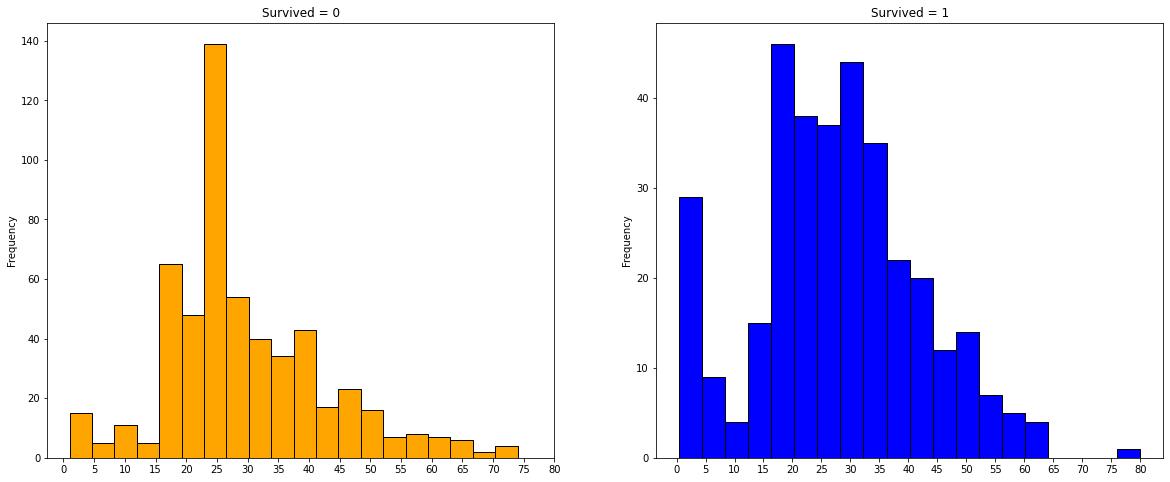

In [21]:
# to see people's ages who are survived or not survived: 

#seting the figure size
f,ax=plt.subplots(1,2,figsize=(20,8))

df_train[df_train['Survived'] == 0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='orange')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

df_train[df_train['Survived'] == 1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='blue')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

##### Observations:
* The age<5 were saved in large numbers(The Women and Child First Policy).
* The group of between 17 and 36 were saved in large numbers. 
* The oldest Passenger was saved(80 years).
* Maximum number of deaths were in the age group of 23-27.

### To see other conditions about survived people:


#### The relationship between sex, class and survived people:

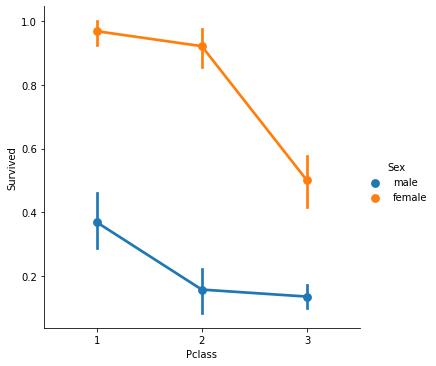

In [22]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)
plt.show()

In [23]:
pd.crosstab([df_train.Sex,df_train.Survived],df_train.Pclass,margins=True).style.background_gradient(cmap='mako')

In [24]:
pd.crosstab([df_train.Survived],df_train.Pclass,margins=True).style.background_gradient(cmap='mako')

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


##### Observations:
* Because of The Women and Child First Policy, women survived more than men. 
* We can see the discrimination between classes. First class more survived than third class.  
* It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate. 
* Death rate by class:
    * %67,75 third class
    * %17,66 second class
    * %14,59 first class 
* Survived rate by class:
    * %34,80 third class
    * %25,43 second class
    * %39,76 first class

#### The relationship between appellation and survived people:

In [25]:
pd.crosstab(df_train.appellation,df_train.Sex).T.style.background_gradient(cmap='mako') #Checking the Initials with the Sex

appellation,Master,Miss,Mr,Mrs,Officer
Sex,,,,,
female,0,186,0,127,1
male,40,0,520,0,17


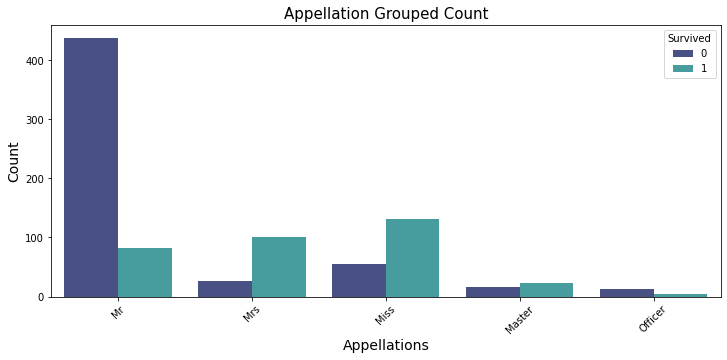

In [26]:
# figure size
plt.figure(figsize=(12,5))

#Plotting the count of title by Survived or not category
sns.countplot(x='appellation', data=df_train, palette="mako",
              hue="Survived")
plt.xlabel("Appellations", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Appellation Grouped Count", fontsize=15)
plt.xticks(rotation=45)
plt.show()

##### Observations:
* This charts confirmed us about women and children survived more than men.
* Employees is bottom at survived people. 

In [27]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,appellation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


#### The Relationship Between Port of Embarkation and Survived People:

In [28]:
pd.crosstab(df_train.Survived,df_train.Embarked,margins=True).style.background_gradient(cmap='mako')

Embarked,C,Q,S,All
Survived,,,,
0,75,47,427,549
1,93,30,217,340
All,168,77,644,889


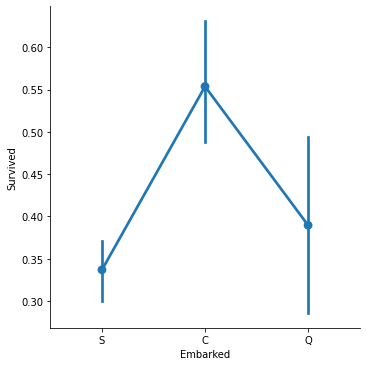

In [29]:
sns.factorplot('Embarked','Survived',data=df_train)
plt.show()

##### Observations:
* Death rate by Port of Embarkation:
    * %8,56 C = Cherbourg, France
    * %13,67 Q = Queenstown,Ireland
    * %77,77 S = Southampton, England


* Survived rate of Ports: 
    * %55,36 of Cherbourg passangers were survived.
    * %38,96 of Queenstown passangers were survived.
    * %33,70 of Southampton passangers were survived.
    * The chances for survival for Port C is highest around 0.55 while it is lowest for S.

#### The Relationship Between Port of Embarkation, Pclass and Survived People:

In [30]:
pd.crosstab([df_train.Embarked,df_train.Pclass],df_train.Survived,margins=True).style.background_gradient(cmap='mako')

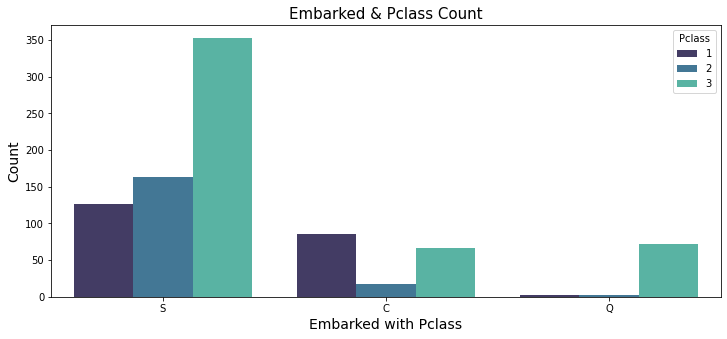

In [31]:
plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=df_train, hue="Pclass",palette="mako")
plt.title('Embarked & Pclass Count', fontsize=15)
plt.xlabel('Embarked with Pclass',fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

In [32]:
pd.crosstab([df_train.Embarked,df_train.Sex],df_train.Survived,margins=True).style.background_gradient(cmap='mako')

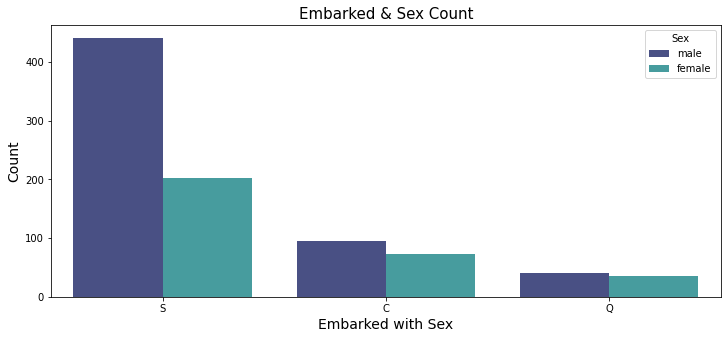

In [33]:
plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=df_train, hue="Sex",palette="mako")
plt.title('Embarked & Sex Count', fontsize=15)
plt.xlabel('Embarked with Sex',fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

##### Observation: 
* Third class passengers mostly embarked from Southampton, England. Top death rate belong this port. 
* Death rate of Port Southampton's men passangers is %85,25. 

#### The Relationship Between SibSp(Sibling/Spouse) and Survived People:

* This feature represents whether a person is alone or with his family members.
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife
    * 0 = The person is alone 1,2,3,4,5,6,7,8 = Number of family person 

In [77]:
pd.crosstab(df_train.SibSp,df_train.Survived,margins=True).style.background_gradient(cmap='mako')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


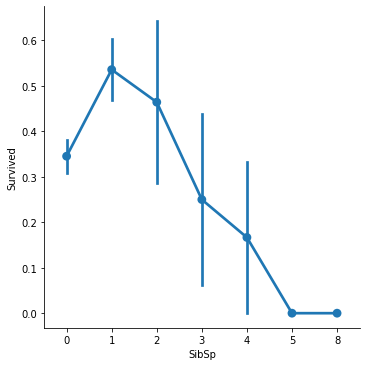

In [76]:
g = sns.factorplot('SibSp','Survived',data=df_train)
plt.show()

##### Observation:
* %68,17 of passengers had not sibling and spouse.
* %61,17 of survived passengers were alone. %34,21 of alone passengers were survived. 
* If person have 1 or 2 family member, survived chance increase. But if they have more family member, survived chance decrease. Probably they tried to save all of them but they didn't it. 

#### The Relationship Between Parch( parents / children) and Survived People:

* This feature represents whether a person is alone or with his family members.
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them.
    * 0 = The person is alone 1,2,3,4,5,6 = Number of family person 

In [37]:
pd.crosstab(df_train.Parch,df_train.Survived,margins=True).style.background_gradient(cmap='mako')

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


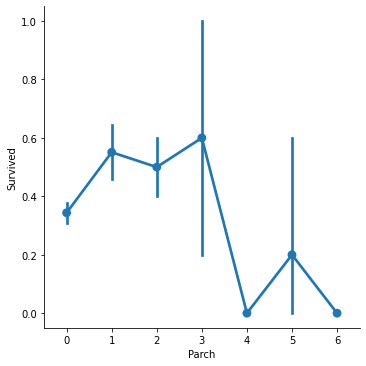

In [38]:
sns.factorplot('Parch','Survived',data=df_train)
plt.show()

##### Observation:
* %76,09 of passengers had not any parent or child.
* %68,12 of survived passengers were alone. %34,36 of alone passengers were survived. 
* If person have 1, 2 or 3 family member, survived chance increase. But if they have more family member, survived chance decrease. Probably they tried to save all of them but they didn't it. It is same with SibSp column. 

#### The Relationship Between Passanger Fare,Pclass and Survived People:

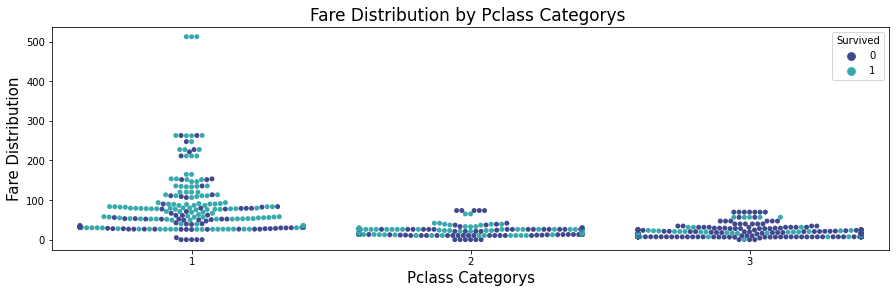

In [83]:
#Seting the figure size
plt.figure(figsize=(15,10))

plt.subplot(2,1,2)
sns.swarmplot(x='Pclass',y="Fare",data=df_train,
              hue="Survived", palette="mako" )
plt.ylabel("Fare Distribution", fontsize=15)
plt.xlabel("Pclass Categorys", fontsize=15)
plt.title("Fare Distribution by Pclass Categorys ", fontsize=17)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

##### Observation:
* The cheapest ticket fare belong Third class. Most of death in this class. 
* The most expensive ticket fare belong first class. Those who paid the highest fares were survived.

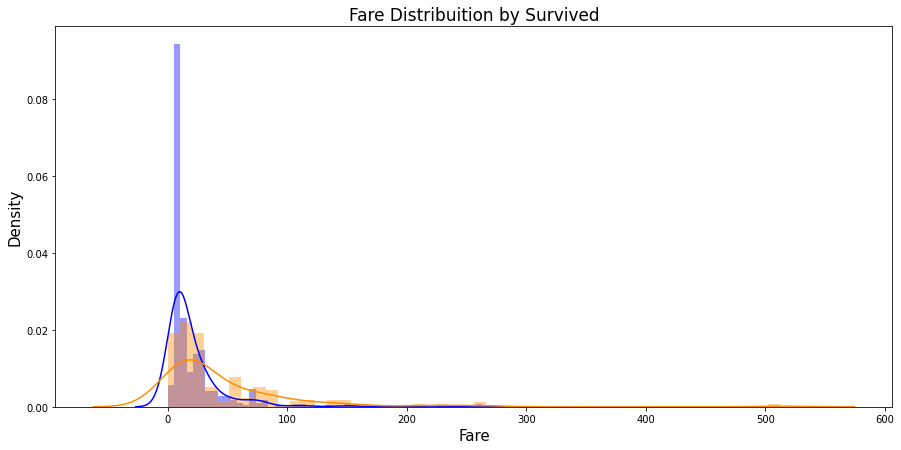

In [116]:
# Seting the figure size
plt.figure(figsize=(15,7))

# Understanding the Fare Distribuition 
sns.distplot(df_train[df_train.Survived == 0]["Fare"], 
             bins=50, color='b')
sns.distplot(df_train[df_train.Survived == 1]["Fare"], 
             bins=50, color='darkorange')
plt.title("Fare Distribuition by Survived", fontsize=17)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

In [101]:
df_train['Fare'].min()
df_train['Fare'].median()
df_train['Fare'].mean()
df_train['Fare'].max()
df_train['Fare'].std()
output = None

#### Description of Fare variable
* Min: 0
* Median: 14.45
* Mean: 32.20
* Max: 512.32
* Std: 49.69

#### The Correlation of Data Set

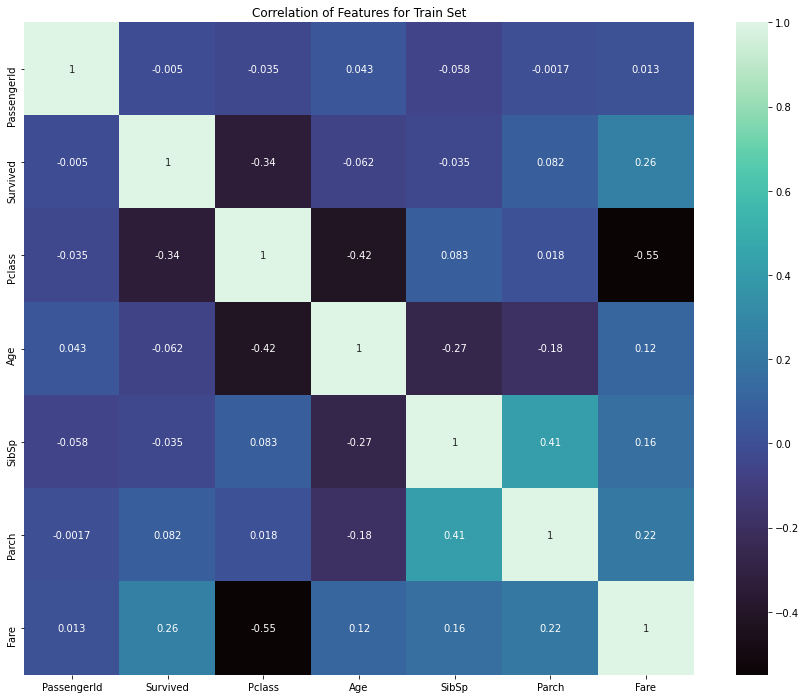

In [113]:
# lets look the correlation of df_train:

plt.figure(figsize=(15,12))
plt.title('Correlation of Features for Train Set')
sns.heatmap(df_train.corr(),vmax=1.0, annot=True,cmap='mako')
plt.show()

##### Observation:
* The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings.
* Correlation coefficient formulas are used to find how strong a relationship is between data. The formulas return a value between -1 and 1, where:
    * 1 indicates a strong positive relationship.
    * -1 indicates a strong negative relationship.
    * A result of zero indicates no relationship at all.
* From the above heatmap,we can see that the features are not much correlated. The highest positive correlation is between SibSp and Parch i.e 0.41. The highest negative correlation is between Pclass and Fare i.e -0.55. 